PART1

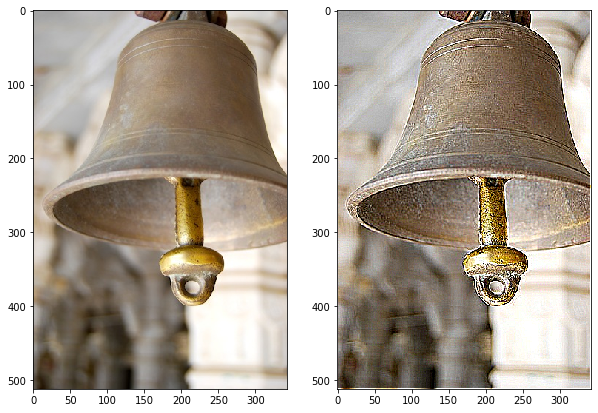

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal 

def Conv(im,f):
    pad=int(f.shape[0]/2)
    img=np.pad(im,((pad,pad),(pad,pad)),'constant',constant_values=((0,0),(0,0)))
    s=np.arange(int(f.shape[0]))[:,None]*int(img.shape[1])+np.arange(int(f.shape[1]))
    col=int(img.shape[1])-int(f.shape[1])+1
    row=int(img.shape[0])-int(f.shape[0])+1
    o=np.arange(row)[:,None]*int(img.shape[1])+np.arange(col)
    n_im=np.take(img,s.ravel()[:,None]+o.ravel())
    f=f.flatten()
    f=np.flip(f)
    res=np.matmul(f,n_im)
    res=np.reshape(res,im.shape)
    
    return res

def HighFilter(A,w):
    centre=int(w/2)
    fil=-1*np.ones((w,w))
    fil[centre,centre]=A+w**2-1
    return fil

image=cv2.imread('A2_resources/bell.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


def HighBoost(image,A,w):
    boost=HighFilter(A,w)
    result=np.zeros(image.shape)
    res=np.zeros(image.shape)

    result[:,:,0]=Conv(image[:,:,0],boost)
    result[:,:,1]=Conv(image[:,:,1],boost)
    result[:,:,2]=Conv(image[:,:,2],boost)

    result=np.clip(result,0,255)
    result=result.astype(np.uint8)
    return result

result=HighBoost(image,1,3)





plt.figure(figsize=(10,20))
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.imshow(result)
plt.show()

PART2

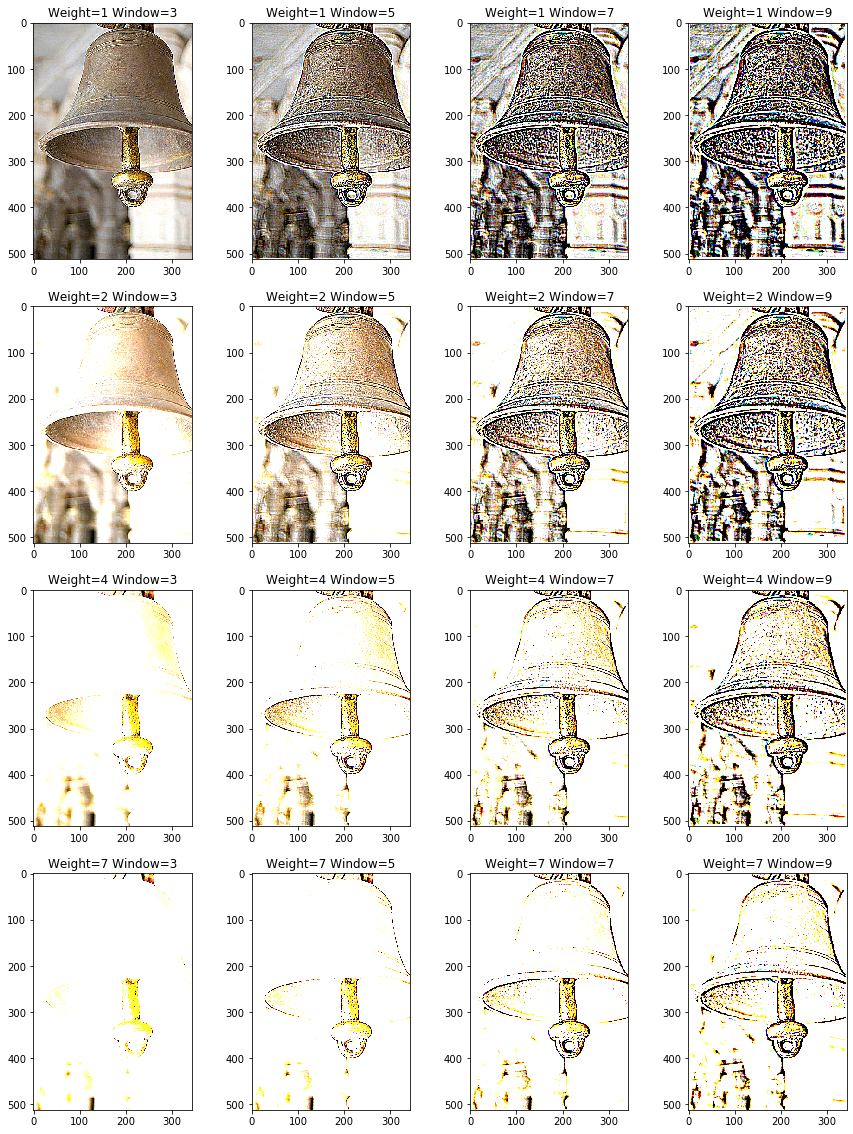

In [11]:
A=[1,2,4,7]
W=[3,5,7,9]

i=1

plt.figure(figsize=(15,20))

for a in A:
    for w in W:
        result=HighBoost(image,a,w)
        plt.subplot(4,4,i)
        plt.title("Weight="+str(a)+" "+"Window="+str(w))
        plt.imshow(result)
        i=i+1
        